In [1]:
# Neezcha Dinman
# ICS 483
# Homework 3

In [292]:
# imports

import numpy
import scipy
from scipy import ndimage
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.filters import sobel
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
####   1   ####

In [4]:
# 1a 
# write your own gaussian function
# scaled_images = my_gaussian_pyramid(image, scale_factor,n_scales, sigma)

In [5]:
# compute the maximum number of scales (max_scales) given the image size and the downscale factor, 
# and set the number of scales of the pyramid as min(max_scales, n_scals). 
# That is, the number of scales in the output pyramid becomes
# max_scales if n_scales > max_scales.

#  gaussian_filter function in the SciPy library for smoothing. However, you
# should implement your own version of down-sampling with given scaling factor.

In [6]:
def scaled_images (image, *args, **kwargs):
    #default values
    scale_factor = kwargs.get('scale_factor', 2)
    n_scales = kwargs.get('n_scales', 5)
    sig = kwargs.get('sigma',  (2 * scale_factor / 6.0) )
    
    # import image 
    img = mpimg.imread(image)
    img = numpy.array(img) 
  
    # output list of images
    imgList = []
    imgList.append(img) 
    
    smallImg = img  
    for x in range(n_scales): 
        # removes high frequency component of the image
        imgGaus = gaussian_filter(smallImg, sigma=sig) 
        # down sample
        imgDown = imgGaus[::scale_factor, ::scale_factor]
        # add to list
        imgList.append(imgDown)
        smallImg = imgDown
        
    return imgList

In [12]:
def displayPyramid (image, imgList):   
    # import image 
    img = mpimg.imread(image)
    imgOrigional = numpy.array(img)
    img = sobel(img)  ################################################################ for part 1c
    
    yM, xN = imgOrigional.shape
                
    # output image
    pyramidImg = numpy.zeros( (yM, (2 * xN)) )
    pyramidImg[0:yM, 0:xN] = img #origional input image
    
    prevY, prevX = 0, xN            
    for i in range(1,len(imgList)):
        img = imgList[i]
        # display, place in pyramidImg with offset
        smallY, smallX = img.shape
        smallY += prevY
        smallX = smallX + xN
        pyramidImg[prevY:smallY,xN:smallX] = img
        prevY = smallY
        
    pyramid = plt.imshow(pyramidImg, cmap='gray',interpolation='nearest')
    
    return pyramidImg

In [8]:
# 1b

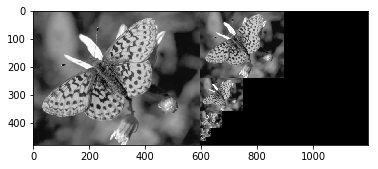

In [9]:
scale1 = scaled_images('butterfly.png')
scale1Pyramid = displayPyramid('butterfly.png', scale1)
plt.imsave('butterfly _pyramid_sf2.jpg', scale1Pyramid, cmap='gray') 

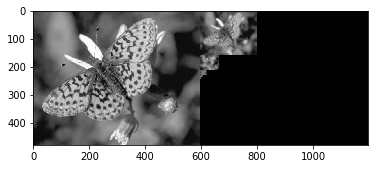

In [10]:
scale2 = scaled_images('butterfly.png', scale_factor=3, n_scales=10, sigma=5)
scale2Pyramid = displayPyramid('butterfly.png', scale2)
plt.imsave('butterfly_pyramid_sf3_sigma5.jpg', scale2Pyramid, cmap='gray') 

In [11]:
# 1c
# sobel function in scikit-image library
# butterfly _pyramid_edges.jpg

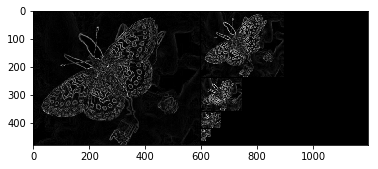

In [14]:
img = mpimg.imread('butterfly.png')
img = numpy.array(img) 
imgSob = sobel(img) 

imgListSob = []
imgListSob.append(imgSob) 
    
for i in range(1,len(scale1)):
    
    imgSob = sobel(scale1[i])
    imgListSob.append(imgSob)
    
sobPyramid = displayPyramid('butterfly.png', imgListSob) 
plt.imsave('butterfly _pyramid_edges.jpg', sobPyramid, cmap='gray') 

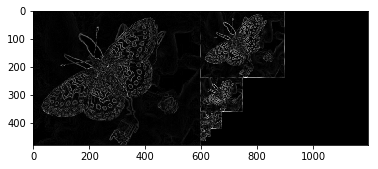

In [12]:
sobelX = ndimage.sobel(scale1, 0)  # horizontal derivative 
sobelY = ndimage.sobel(scale1, 1)  # vertical derivative 
sobelMag = numpy.hypot(sobelX, sobelY)  # magnitude 
sobelMag *= 255.0 / numpy.max(sobelMag)  # normalize (Q&D) 
plt.imshow(sobelMag, cmap='gray') 
#plt.imsave('butterfly _pyramid_edges.jpg', sobelMag, cmap='gray')  

In [15]:
# 1d
# resize function in scikit-image library
# Resized the resulting gradient magnitude images to match the size of input image
# butterfly_pyramid_edge{n}.jpg whre n is 0-4

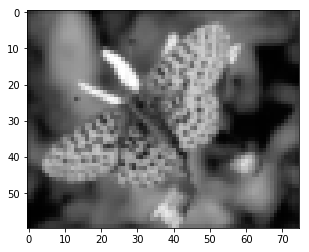

In [16]:
# resize = rescale(img, 3, anti_aliasing=False)
image_resized = resize(img, (scale1[3].shape[0] // 1, scale1[3].shape[1] // 1), anti_aliasing=True)
plt.imshow(image_resized, cmap='gray')

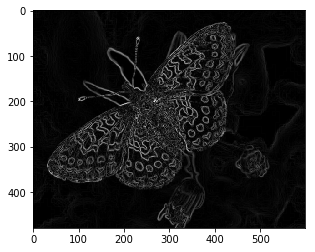

In [42]:
#img = mpimg.imread('butterfly.png')
#img = numpy.array(img) 
imgRe = resize(imgListSob[0], (imgListSob[0].shape[0] , imgListSob[0].shape[1]), anti_aliasing=True)

imgListRe = []
imgListRe.append(imgRe) 
    
for i in range(1,len(scale1)):
    
    imgResize = resize(img, (imgListSob[i].shape[0], imgListSob[i].shape[1]), anti_aliasing=True)
    imgListRe.append(imgRe)
    
#sobPyramid = displayPyramid('butterfly.png', imgList) 
#plt.imsave('butterfly_pyramid_edge{n}.jpg', sobPyramid, cmap='gray') 
plt.imshow(imgListRe[3], cmap='gray')

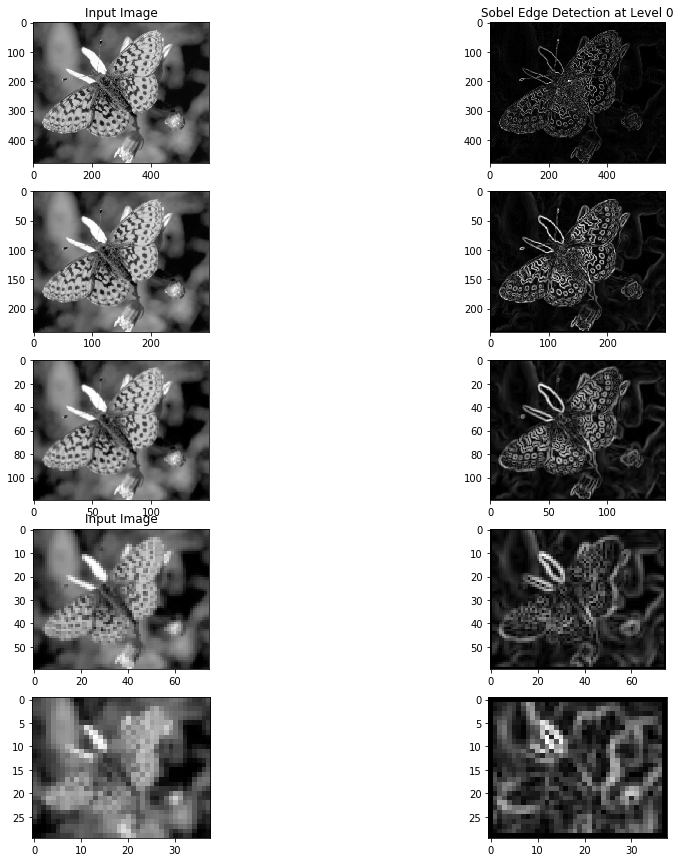

In [49]:
# idsplay comparisons 
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
       
fig.add_subplot(5,2,1)
plt.imshow(scale1[0], cmap='gray')
plt.title('Input Image', fontsize=12)

fig.add_subplot(5,2,2)
plt.imshow(imgListSob[0], cmap='gray')
plt.title('Sobel Edge Detection at Level 0', fontsize=12)
edge0 = numpy.concatenate((scale1[0],imgListSob[0]),axis=1)
plt.imsave('butterfly_pyramid_edge0.jpg', edge0, cmap='gray') 


fig.add_subplot(5,2,3)
plt.imshow(scale1[1], cmap='gray')

fig.add_subplot(5,2,4)
plt.imshow(imgListSob[1], cmap='gray')
edge1 = numpy.concatenate((scale1[1],imgListSob[1]),axis=1)
plt.imsave('butterfly_pyramid_edge1.jpg', edge4, cmap='gray') 


fig.add_subplot(5,2,5)
plt.imshow(scale1[2], cmap='gray')

fig.add_subplot(5,2,6)
plt.imshow(imgListSob[2], cmap='gray')
edge2 = numpy.concatenate((scale1[2],imgListSob[2]),axis=1)
plt.imsave('butterfly_pyramid_edge2.jpg', edge2, cmap='gray') 


fig.add_subplot(5,2,7)
plt.imshow(scale1[3], cmap='gray')
plt.title('Input Image', fontsize=12)

fig.add_subplot(5,2,8)
plt.imshow(imgListSob[3], cmap='gray')
edge3 = numpy.concatenate((scale1[3],imgListSob[3]),axis=1)
plt.imsave('butterfly_pyramid_edge3.jpg', edge3, cmap='gray') 


fig.add_subplot(5,2,9)
plt.imshow(scale1[4], cmap='gray')

fig.add_subplot(5,2,10)
plt.imshow(imgListSob[4], cmap='gray')
edge4 = numpy.concatenate((scale1[4],imgListSob[4]),axis=1)
plt.imsave('butterfly_pyramid_edge4.jpg', edge4, cmap='gray') 

In [30]:
####   2   ####

In [15]:
# 2a

In [16]:
# Step 1: Compute derivatives of the input image in x- and y-direction --- sigma 1
# https://stackoverflow.com/questions/7185655/applying-the-sobel-filter-using-scipy
# Step 2: Construct the second moment matrix M in a Gaussian window around each pixel.
# Step 3: Compute the corner response function --- two options for computing corner response
# Step 4: Threshold the corner response value computed above --- set threshold = thresholding_factor * max_corner_response
# Step 5: Find local maxima of response function (non-maximum suppression)
# Step 6: Display resulting corners ---  show resulting corners as red dots on top of the input image as shown below

In [810]:
def corner_detection (image, *args, **kwargs):
    thresholding =  kwargs.get('thresholding', .1) # used for step 4
    minDist = kwargs.get('minDist', 10)  # used for step 5 minimum distance between corners used for non-maximum suppression
    responce = kwargs.get('responce', 1) # used for Step 3, implement two options for computing corner response:
    alpha = kwargs.get('alpha', .05)     # (1) 𝑅 = det(𝑀) − 𝛼 ∗ 𝑡𝑟𝑎𝑐𝑒(𝑀) 2. (Set 𝛼 = 0.05 as default value.)
                                         # (2) 𝑅 = det(𝑀) / (𝑡𝑟𝑎𝑐𝑒(𝑀) + 10−6)
    
    # import image 
    img = mpimg.imread(image)
    img = rgb2gray(img)
    img = numpy.array(img)
    
    # Setp 1 apply gausian to images, use soble to find derivative in x y direction
    libGaus = gaussian_filter(img, sigma=1)
    sobelX = ndimage.sobel(libGaus, 0)  # horizontal derivative 
    sobelY = ndimage.sobel(libGaus, 1)  # vertical derivative 
    # plt.imshow(sobelX, cmap='gray') # test 
    
    # Step 2 second moment matrix in a guassian window around each pixle 
    # products of derivatives at each pixle
    derive2X = sobelX**2
    derive2Y = sobelY**2
    deriveXY = sobelY*sobelX
    # gaussian window  
    S2X = (gaussian_filter(img, sigma=2)) * derive2X
    S2Y = (gaussian_filter(img, sigma=2)) * derive2Y
    SXY = (gaussian_filter(img, sigma=2)) * deriveXY
    
    # Step 3 R = corner responce function 
    det = (S2X * S2Y) - (SXY**2)
    trace = S2X + S2Y
    if responce == 1:
        R = det - (alpha * (trace ** 2)) #R.shape (479, 598)
    elif responce == 2:
        R = det / (trace + 10**-6) 
    
    # Step 4 thresholding
    xmax = numpy.max(R)
    threshold = thresholding * xmax
    rThresh = numpy.copy(R)
    rThresh[rThresh >= threshold] = 0
    
    # Step 5 non maximum supresion 
    localMax = numpy.copy(rThresh)
    localMax = numpy.asarray(localMax)
    imgMaxPoints = []
    maxCordinates = []
    # relative coordinate grid for local neighbourhood suppression
    windowSize = numpy.mgrid[-minDist:minDist + 1]
    for y in range(len(localMax)):
        for x in range(len(localMax[y])):
            current = localMax[y,x]
            if current > threshold:
                # coordinate grid for local neighbourhood
                yNH = y + windowSize
                xNH = x + windowSize
                
                # suppress neighbourhood
                localMax[yNH, xNH] = 0
                
                # add current feature to peaks
                imgMaxPoints.append(current)
                currentCordinates = [y,x]
                maxCordinates.append(currentCordinates)
    
    
    # print(localMax)
    # print(imgMaxPoints)
    # print(maxCordinates)
    # Step 6 display as red 
    
    # plt.imshow(R, cmap='gray')               
    return localMax

In [811]:
#2b
# apply to butterfly image butterfly_corners_resp{m}_tf{n}.jpg

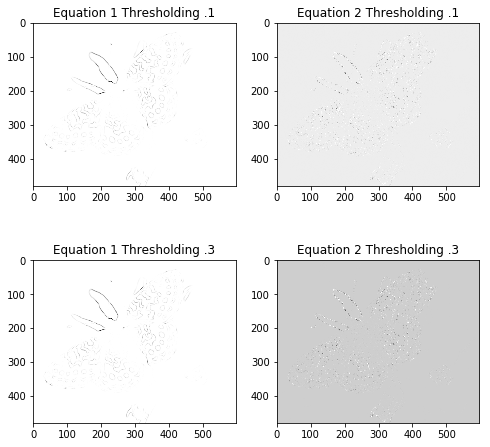

In [818]:
# comparisons 
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
       
fig.add_subplot(2,2,1)
plt.title('Equation 1 Thresholding .1', fontsize=12)
butter = corner_detection ('butterfly.png',responce=1, thresholding=.1 )
plt.imsave('butterfly_corners_resp1_tf.1.jpg', butter, cmap='gray')

fig.add_subplot(2,2,2)
plt.title('Equation 2 Thresholding .1', fontsize=12)
butter = corner_detection ('butterfly.png',responce=2, thresholding=.1 )
plt.imsave('butterfly_corners_resp2_tf.1.jpg', butter, cmap='gray')

fig.add_subplot(2,2,3)
plt.title('Equation 1 Thresholding .3', fontsize=12)
butter = corner_detection ('butterfly.png',responce=1, thresholding=.3 )
plt.imsave('butterfly_corners_resp1_tf.3.jpg', butter, cmap='gray')

fig.add_subplot(2,2,4)
plt.title('Equation 2 Thresholding .3', fontsize=12)
butter = corner_detection ('butterfly.png',responce=2, thresholding=.3 )
plt.imsave('butterfly_corners_resp2_tf.3.jpg', butter, cmap='gray')

# equation 2 is darker overall image and results in less difinative lines
# increasing thresholding value increases line size 

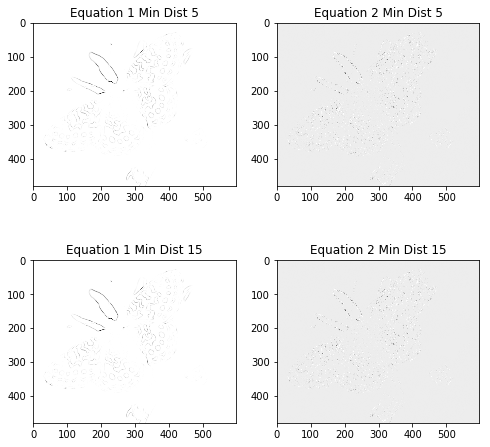

In [819]:
# comparisons 
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
       
fig.add_subplot(2,2,1)
plt.title('Equation 1 Min Dist 5', fontsize=12)
butter = corner_detection ('butterfly.png',responce=1, minDist=5 )
plt.imsave('butterfly_corners_resp1_mindist5.jpg', butter, cmap='gray')

fig.add_subplot(2,2,2)
plt.title('Equation 2 Min Dist 5', fontsize=12)
butter = corner_detection ('butterfly.png',responce=2, minDist=5 )
plt.imsave('butterfly_corners_resp2_mindist5.jpg', butter, cmap='gray')

fig.add_subplot(2,2,3)
plt.title('Equation 1 Min Dist 15', fontsize=12)
butter = corner_detection ('butterfly.png',responce=1, minDist=15 )
plt.imsave('butterfly_corners_resp1_mindist15.jpg', butter, cmap='gray')

fig.add_subplot(2,2,4)
plt.title('Equation 2 Min Dist 15', fontsize=12)
butter = corner_detection ('butterfly.png',responce=2, minDist=15 )
plt.imsave('butterfly_corners_resp2_mindist15.jpg', butter, cmap='gray')

# equation 2 is darker overall image and results in less difinative lines
# unfortunately for my implamentation, changing the min distance has little to no affect 

In [611]:
# 2c 
# apply to butterfly rotated image

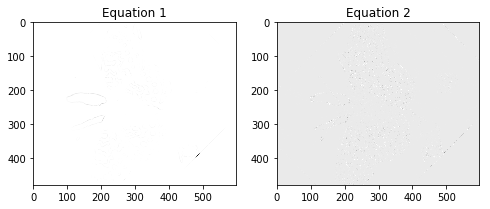

In [822]:
# comparisons 
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
       
fig.add_subplot(1,2,1)
plt.title('Equation 1 on rotated', fontsize=12)
butter = corner_detection ('butterfly_rotated.png',responce=1)
plt.imsave('butterfly_corner_resp1_rot.jpg', butter, cmap='gray')

fig.add_subplot(1,2,2)
plt.title('Equation 2 on rotated', fontsize=12)
butter = corner_detection ('butterfly_rotated.png',responce=2)
plt.imsave('butterfly_corner_resp2_rot.jpg', butter, cmap='gray')

# equation 2 is darker overall image and results in less difinative lines
# the results are much lighter and difficult to see, less is detected

In [21]:
# 2d
# apply to butterfly different sizes

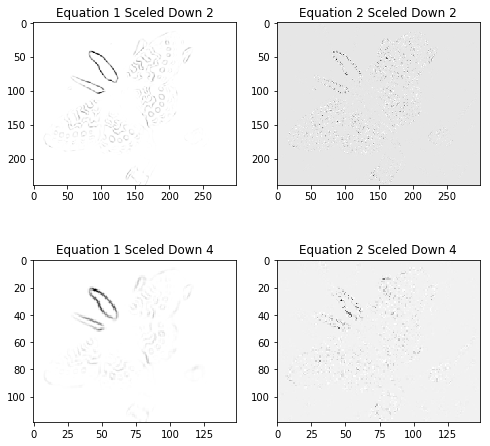

In [824]:
# comparisons 
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
       
fig.add_subplot(2,2,1)
plt.title('Equation 1 Sceled Down 2', fontsize=12)
butter = corner_detection ('butterfly_down2.png',responce=1)
plt.imsave('butterfly_corner_resp1_down2.jpg', butter, cmap='gray')

fig.add_subplot(2,2,2)
plt.title('Equation 2 Sceled Down 2' , fontsize=12)
butter = corner_detection ('butterfly_down2.png',responce=2)
plt.imsave('butterfly_corner_resp2_down2.jpg', butter, cmap='gray')

fig.add_subplot(2,2,3)
plt.title('Equation 1 Sceled Down 4', fontsize=12)
butter = corner_detection ('butterfly_down4.png',responce=1)
plt.imsave('butterfly_corner_resp1_down4.jpg', butter, cmap='gray')

fig.add_subplot(2,2,4)
plt.title('Equation 2 Sceled Down 4', fontsize=12)
butter = corner_detection ('butterfly_down4.png',responce=2)
plt.imsave('butterfly_corner_resp2_down4.jpg', butter, cmap='gray')

# equation 2 is darker overall image and results in less difinative lines
# the lines are visably incereasing in blurr as the image is scaled down, details are lost